In [2]:
# This is a Python 3 environment

# Base level imports for data science work
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os
from os import path
from json import decoder
import glob, os, json
import re

# Visualization Libs
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# NLP Libs
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from keras.preprocessing import text, sequence
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Additional Libs
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

# Deep Learning Libs
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [3]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
#cd /content/drive/MyDrive/BA/0.4/Sources/

# Start der Datenverarbeitung

In [5]:
#Herunterladen des Data Frame
df = pd.read_csv("https://chruezfalsch.ch/df_ba.csv")
del df['Unnamed: 0'] 

In [6]:
df.sample(10)

,source,fake,text
16388,Telegram,1,Was für ein System… wird mal langsam Zeit dass...
53697,Telegram,1,"💥‼️ Selbst der Begriff der „Notbremse"" wird wi..."
24229,Telegram,1,Hurra nur das es mal nicht verheimlicht werden...
19221,Telegram,1,https://youtu.be/KjOOeyQ9KLA
37916,Telegram,1,"Eine neue Meldung:\nLiebe Mara,\nHabe am Samst..."
36696,Telegram,1,Eine neue Meldung:\nFrage an die Gruppe:\n\nIm...
3938,Telegram,1,ES IST NUR NOCH ZUM VERZWEIFEN ! 🥺
836,blick.ch,0,Dunkelziffer-Studie zeigt\nSo viele Menschen v...
37260,Telegram,1,🚑🏥\nKÖNNT IHR NACHTS ÜBERHAUPT NOCH RUHIG SCHL...
58890,Telegram,1,⚠️⚠️⚠️DIE BUNDESWEHR BEREITET SICH VOR UND STE...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


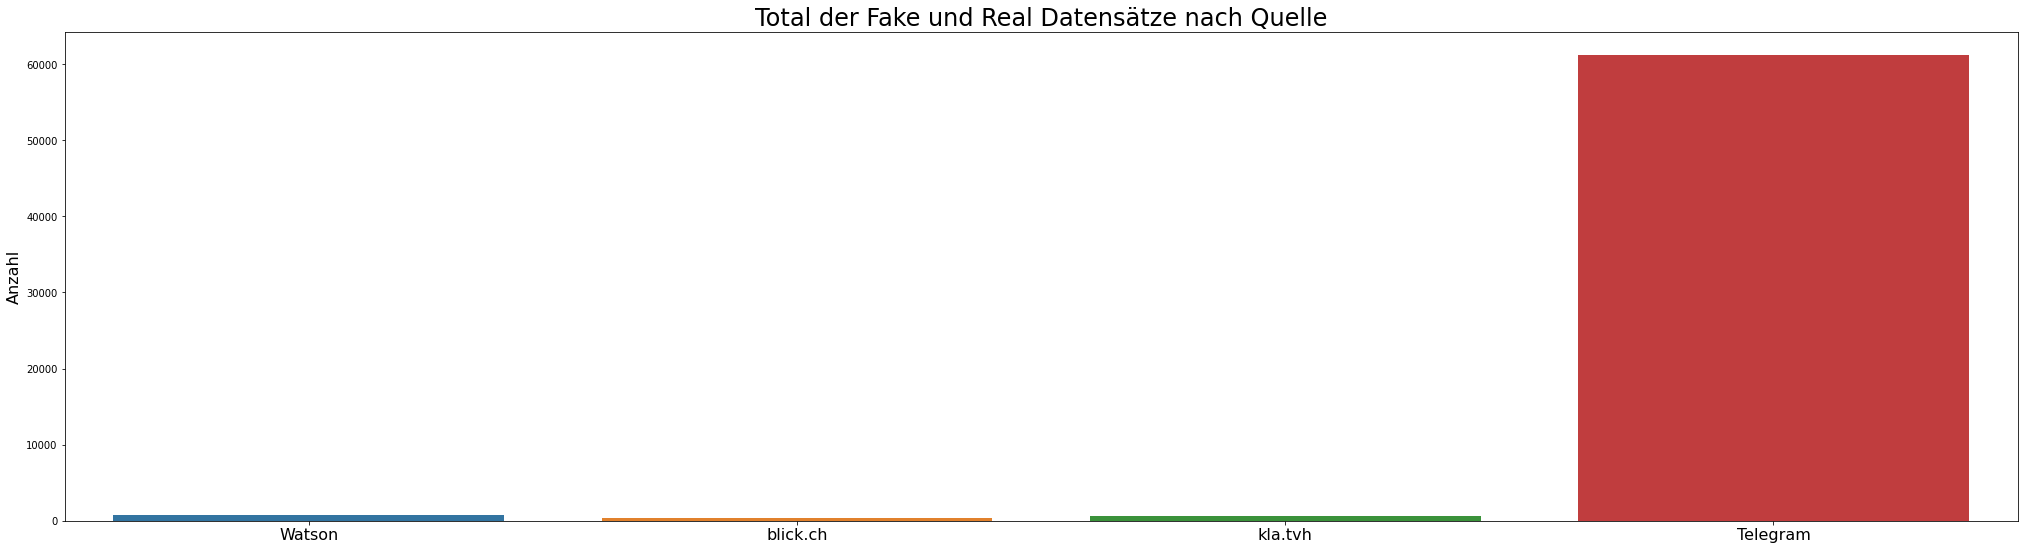

In [7]:
#UNBERENIGTE DATEN
#Ploten der Verteilung der Datensätze nach Quellen
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total der Fake und Real Datensätze nach Quelle', fontsize=24)
plt.ylabel('Anzahl', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

In [8]:
#Berechnung der länge der einzelnen Datensätze
df['text'] = df['text'].astype(str)
df['len'] = df['text'].str.split().map(lambda x: len(x))

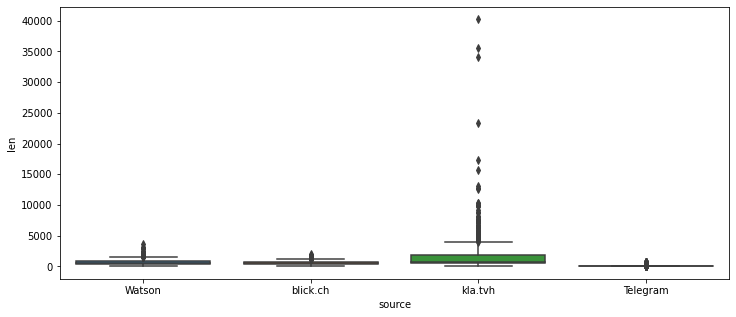

In [9]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='source', y='len', data=df)
plt.show()

In [10]:
df = df[df['text'].str.split().str.len().gt(400)]
df = df[df['text'].str.split().str.len().lt(4500)]

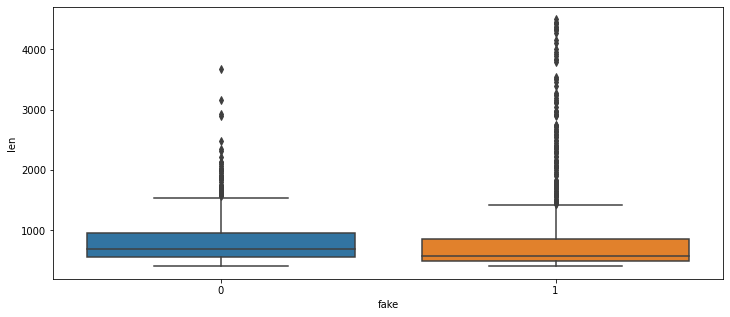

In [11]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='fake', y='len', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


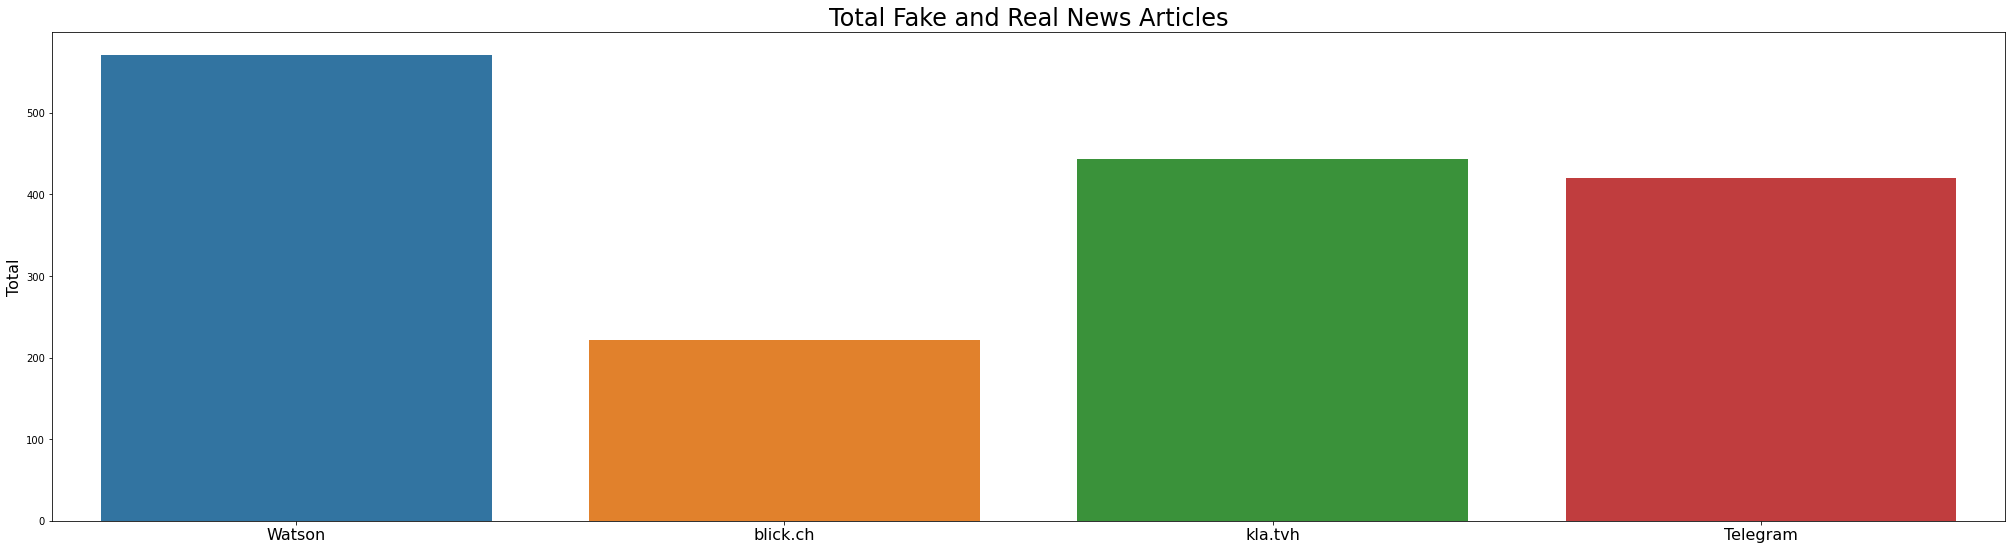

In [12]:
plt.figure(figsize=(35,9))

sns.countplot(df.source)
plt.title('Total Fake and Real News Articles', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=16)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


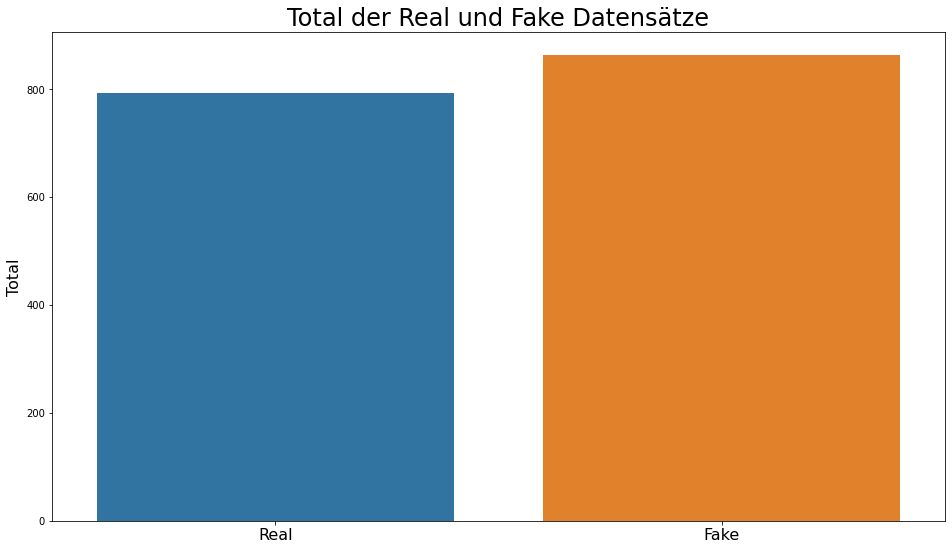

In [13]:
#Aufteilung Fake und Real News
plt.figure(figsize=(16,9))

sns.countplot(df.fake)
plt.title('Total der Real und Fake Datensätze', fontsize=24)
plt.ylabel('Total', fontsize=16)
plt.xlabel('')
plt.xticks([0,1], ['Real','Fake'], fontsize=16)
plt.xticks(fontsize=16)

plt.show()

In [14]:
import nltk
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
stop = set(stopwords.words('german'))
punctuation = list(string.punctuation)
stop.update(punctuation)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
def removeurls(text):
  return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
def removeklatv(text):
  return re.sub("(?i)kla.tv:","Quelle", text)
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
def wordstem(text):
    stemmer = SnowballStemmer("german")
    final_text = []
    for i in text.split():
      word=""
      for z in i:
        if z.isalpha():
          word=word+z
        else:
          if word !="":
            stemed=stemmer.stem(word)
            if stemed == "":
                stemed=word
            final_text.append(stemed)
            #print(word, "/", stemed)
          word=""
          final_text.append(z)
          #final_text.append(stemmer.stem(i.strip()))
        final_text.append(" ")
    return "".join(final_text)
# Final function to clean the text
def clean_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_urls(text)
    text = remove_stopwords(text)
    #text = wordstem(text)
    return text

In [17]:
#Quellen Entfernen
df['text']=df['text'].replace("kla.tv", "Quelle")
df['text']=df['text'].replace("KLA.TV", "Quelle")
df['text']=df['text'].replace("KLA.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV:", "Quelle")
df['text']=df['text'].replace("Kla.TV", "Quelle")
df['text']=df['text'].replace("blick.ch", "Quelle")
df['text']=df['text'].replace("watson.ch", "Quelle")
df['text']=df['text'].replace("watson", "Quelle")
df['text']=df['text'].replace("Zeit Online", "Quelle")
df['text']=df['text'].replace("Zeit online", "Quelle")
df['text']=df['text'].replace("zeit online", "Quelle")
df['text']=df['text'].replace("(...)", "")
df['text']=df['text'].replace("...", ".")
df['text']=df['text'].replace("!!!", "!")
df['text']=df['text'].replace("???", "?")
df['text']=df['text'].replace("ß", "ss")

In [18]:
df['text']=df['text'].apply(removeurls)
df['text']=df['text'].apply(removeklatv)
df['text']=df['text'].apply(remove_emojis)
df['text']=df['text'].apply(clean_text)

In [19]:
df.sample(10)

,source,fake,text,len
511,Watson,0,Sonnenanbetern blutet Anblicken Herz. Gitterzä...,609
1604,kla.tvh,1,"Gleichgeschaltete Klima-Presse 28.07.2020 Hi, ...",481
1641,kla.tvh,1,Verstärkt 5G-Strahlung Erkrankungen Coronaviru...,607
9262,Telegram,1,Gerade bekommen: Warheit kommt immer ans Licht...,534
46131,Telegram,1,neue Meldung: Hallo Mara. ebenfalls herzliches...,466
921,blick.ch,0,Corona-Ausbruch Altersheimen Giswil OW Savogni...,856
136,Watson,0,"Ralph Stöckli, steigen Freitag wiederholten Ma...",808
734,Watson,0,überstandenen Infektion Coronavirus SARS-CoV-2...,507
457,Watson,0,Schweiz zeichnet langsam Licht Ende Tunnels ab...,1001
31218,Telegram,1,"neue Meldung: Liebe Mara, 10:25 10:46: Fürs Ga...",510


In [22]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat 'df_ba.csv': No such file or directory


In [ ]:
cd /content/drive/MyDrive/BA/Project/

In [24]:
df.to_csv('df_ba_cleaned.csv')
!cp df_ba_cleaned.csv "/content/drive/MyDrive/BA/Project/df_ba_cleaned.csv"